In [1]:
#import library yang diperlukan
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# from matplotlib.lines import Line2D
import seaborn as sns
import time

In [2]:
#membaca dataset
data = pd.read_csv('F:\Kuliah\Semester 7\Data Mining\Data Dow Jones\creditcard.csv', sep=',')
#data diambil dari kaggle.com/mlg-ulb/creditcardfraud

print (data.columns)
data.head()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
#print rangkuman statistik per feature
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
pd.options.display.float_format = "{:.6f}".format
data.describe(include='all')
# data.describe().to_csv("my_description.csv")


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,1.088850,1.020713,0.999201,0.995274,0.958596,0.915316,0.876253,0.849337,0.838176,0.814041,0.770925,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,-0.535426,-0.762494,-0.405571,-0.648539,-0.425574,-0.582884,-0.468037,-0.483748,-0.498850,-0.456299,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,-0.032757,0.140033,-0.013568,0.050601,0.048072,0.066413,-0.065676,-0.003636,0.003735,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,0.739593,0.618238,0.662505,0.493150,0.648821,0.523296,0.399675,0.500807,0.458949,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [5]:
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

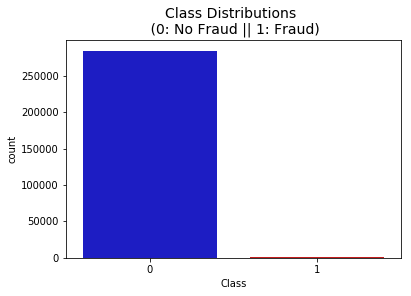

In [6]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=data, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [7]:
data.groupby('Class').size()

Class
0    284315
1    492   
dtype: int64

In [8]:
#data preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler
# StandardScaler menghilangkan mean dan men-scale data ke unit variance

std_scaler = StandardScaler()

data['scaled_amount'] = std_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
#data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

#mengubah nama kolom Time Amount menjadi scaled_time dan scaled_amount
scaled_amount = data['scaled_amount']
#scaled_time = data['scaled_time']

data.drop(['scaled_amount'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
#data.insert(1, 'scaled_time', scaled_time)

data.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [9]:
fraud_data_all = data.loc[data['Class'] == 1]
nonFraud_data_all = data.loc[data['Class']==0]

#menggabungkan data fraud dan non-fraud
normal_distributed_data_all = pd.concat([fraud_data_all, nonFraud_data_all])
normal_distributed_data_all.shape
#normal_distributed_data_all.head()
# data2.head()
#fraud_data_all.shape

X = normal_distributed_data_all.drop('Class', axis=1)
y = normal_distributed_data_all['Class']
#X --> variabel label untuk prediksi
#y --> variabel tujuan

#Memecah dataset baru menjadi training dan test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [10]:
print ("Rincian class pada data training {} dan testing {} " .format(Counter(y_train), Counter(y_test)))

Rincian class pada data training Counter({0: 199013, 1: 351}) dan testing Counter({0: 85302, 1: 141}) 


In [11]:
X_train.shape

(199364, 29)

In [12]:
X_test.shape

(85443, 29)

In [13]:
#proses undersampling
X_train['Class'] = y_train

C:\Users\Muhsin Ahadi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
non_fraud = X_train.loc[X_train['Class']==0]
fraud = X_train.loc[X_train['Class']==1]

non_fraud_points = non_fraud.drop('Class', axis = 1)
fraud_points = fraud.drop('Class', axis = 1)

non_fraud_points=np.array(non_fraud_points)
fraud_points = np.array (fraud_points)

In [15]:
#menghitung euclidean distance
from scipy.spatial import distance
Y = distance.cdist(fraud_points, non_fraud_points, 'euclidean')

#mengurutkan hasil secara ascending
K = np.argsort(Y)
# print (Y)
# print ("Urutan data: \n", K)
Y.sort()
# print ("After sort: \n", Y)
Y.shape

(351, 199013)

In [16]:
#tentukan berapa nearest neighbor yang ingin diambil
array_new = np.array(non_fraud_points[K[:,0:20]])
array_new.shape
XX= array_new.transpose(0,1,2).reshape(array_new.shape[0]*array_new.shape[1],29)
# XX
zeros_value = np.zeros((array_new.shape[0]*array_new.shape[1],1))
new_X = np.concatenate ((XX, zeros_value), axis=1)

print (new_X.shape)
new_X= np.unique(new_X,axis=0)
print (new_X.shape)

(7020, 30)
(1574, 30)


In [17]:
#menggabungkan class minority dengan class majority hasil undersampling 
array_minority = np.array(fraud)
joined_resampling = np.concatenate((array_minority,new_X), axis=0)

X_resample = joined_resampling[:,0:29]
# X_resample = std_scaler.fit_transform(X_resample)
y_resample = joined_resampling[:,29]
# print (y)

print ('Setelah undersampling, komponen data: {}' .format(Counter(y_resample)))

Setelah undersampling, komponen data: Counter({0.0: 1574, 1.0: 351})


In [18]:
#proses training
t0 = time.time()
svm = SVC(gamma='auto', kernel='rbf', C=10)
svm.fit(X_resample,y_resample)
X_resample.shape
t1 = time.time()
print ("waktu training: {:3f} " .format(t1-t0))

waktu training: 0.187505 


In [19]:
from sklearn.metrics import confusion_matrix

y_pred = svm.predict(X_resample)
conf_matrix_train = confusion_matrix(y_resample, y_pred)
print (conf_matrix_train)
# print (X.shape)
print ("Classification Report:", '\n', classification_report_imbalanced(y_resample, y_pred))

[[1572    2]
 [  30  321]]
Classification Report: 
                    pre       rec       spe        f1       geo       iba       sup

        0.0       0.98      1.00      0.91      0.99      0.96      0.92      1574
        1.0       0.99      0.91      1.00      0.95      0.96      0.91       351

avg / total       0.98      0.98      0.93      0.98      0.96      0.92      1925



In [20]:
X_test['Class'] = y_test
non_fraud2 = X_test.loc[X_test['Class']==0]
fraud2 = X_test.loc[X_test['Class']==1]

non_fraud2_points2 = non_fraud2.drop('Class', axis = 1)
fraud2_points2 = fraud2.drop('Class', axis = 1)

non_fraud2_points2=np.array(non_fraud2_points2)
fraud2_points2 = np.array (fraud2_points2)

zeros_value2 = np.zeros((non_fraud2_points2.shape[0],1), dtype=np.int8)

new_non_fraud = np.concatenate((non_fraud2_points2, zeros_value2), axis=1)

array_majority2 = np.array(fraud2)
joined_testing =np.concatenate ((array_majority2, new_non_fraud), axis =0)

X_test_new = joined_testing[:,0:29]
# X_test_new = rob_scaler.fit_transform(X_test_new)
y_test_new = joined_testing[:,29]


print (X_test_new.shape)
print ("Rincian class pada data  testing {} " .format(Counter(y_test_new)))

(85443, 29)
Rincian class pada data  testing Counter({0.0: 85302, 1.0: 141}) 


C:\Users\Muhsin Ahadi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
#proses prediksi model terhadap testing set
t0 = time.time()
y_pred_test = svm.predict(X_test_new)
print(X_test_new.shape)
conf_matrix_test = confusion_matrix(y_test_new, y_pred_test)
print (conf_matrix_test)
# print (X_test.dtype)
print ("Classification Report:", '\n', classification_report_imbalanced(y_test_new, y_pred_test))
t1 = time.time()
print ("waktu training: {:3f} " .format(t1-t0))

(85443, 29)
[[85252    50]
 [   31   110]]
Classification Report: 
                    pre       rec       spe        f1       geo       iba       sup

        0.0       1.00      1.00      0.78      1.00      0.88      0.80     85302
        1.0       0.69      0.78      1.00      0.73      0.88      0.76       141

avg / total       1.00      1.00      0.78      1.00      0.88      0.80     85443

waktu training: 5.454366 


In [22]:
svm

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

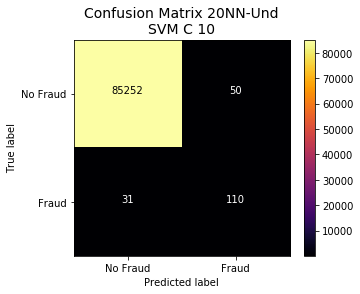

In [23]:
from sklearn.metrics import confusion_matrix

#Menerapkan confusion matrix pada testing set
y_pred = svm.predict(X_test_new)


#log
#mengganti testing setnya dengan testing set untuk data keseluruhan
svm_cf = confusion_matrix(y_test_new, y_pred)

import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(5,4))

plot_confusion_matrix(svm_cf, labels, title="Confusion Matrix 20NN-Und\nSVM C 10", cmap=plt.cm.inferno)